jupyter nbconvert Introduction_to_Scikit-Learn.ipynb --to slides --post serve

# Intodution to Scikit-learn in a regression problem

&nbsp;

&nbsp;

&nbsp;

<center><b>César Reyes - Data Scientist</b></center>
<img src="../img/bluekiri.svg" width=300>


# Data Science Ecosystem
<img src='../img/ecosystem.png'>

# Scikit-learn
**Machine Learning in Python**
- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

**Some modules:**
- Preprocessing
- Classification
- Regression
- Clustering
- Model selection
- ...


## General schema

&nbsp;


<img src='../img/machine-learning-example.png' width=500>
<center>REF: https://medium.com/@tekaround/train-validation-test-set-in-machine-learning-how-to-understand-6cdd98d4a764</center>

##  Main design
Scikit-Learn's API is a remarkably well designed. These are the main design principles:

- **Consistency**: All objects share a consistent and simple interface:
    - **Estimators**: any object that can learn some parameters based on a dataset is called an estimator (fit() method)
    - **Transformers**: some estimator can transform a dataset using learned parameters (transform() or fit_transform() method)
    - **Predictors**: some estimator can make prediction given a new instance of a dataset (predict() method + score() method)

- **Inspection**
    - All the estimetor's hyperparameters are accessible directly via public instance variable
    - All the estimator's learned parameters are accesible via public instance variables with a "_" suffix

- **Nonproliferation of clases**
    - Dataset are repesented as Numpy or Scipy sparse matrices
    - Hyperparameters are represented as simple string or python number

- **Composition**:
    - It's easy create a Pipeline estimator to build an arbitrary sequence of transformers followed a final estimator.

- **Sensible defaults hyperparameters**
    - Scikit-Learn provide a reasonable defaults values, making easy to create a baseline estimator.

## Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Estimator - Transformer

In [2]:
from sklearn.impute import SimpleImputer

In [3]:
X_train = np.asarray([0, 2, None, 2,], dtype='float').reshape(-1,1)
X_test = np.asarray([1, None,], dtype='float').reshape(-1,1)

In [4]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [5]:
imputer.transform(X_test)

array([[1.],
       [2.]])

In [6]:
imputer.strategy, imputer.statistics_

('most_frequent', array([2.]))

### Estimator - Predictor

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# y = -x + 3
X_train = np.array([0, 1, 2]).reshape(-1,1)
y_train = np.array([3, 2, 1]).reshape(-1,1)

In [9]:
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
X_test = np.array([1.5, 2.5]).reshape(-1,1)
y_test = np.array([1.5, 0.5]).reshape(-1,1)

In [11]:
lr_model.predict(X_test)

array([[1.5],
       [0.5]])

In [12]:
lr_model.fit_intercept, lr_model.coef_, lr_model.intercept_

(True, array([[-1.]]), array([3.]))

In [13]:
# R^2 score
lr_model.score(X_test, y_test)

1.0

### Nonproliferation of clases 


In [14]:
lr_model.predict([[0]])

array([[3.]])

In [15]:
type(lr_model.predict([[0]]))

numpy.ndarray

In [16]:
from scipy.sparse import csc_matrix
sparse = csc_matrix([[0], [0], [1]], dtype='float')
sparse

<3x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Column format>

In [17]:
lr_model.predict(sparse)

array([[3.],
       [3.],
       [2.]])

In [18]:
#lr_model.predict([0])

### Composition

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
X_train = np.array([0, 1, 2, 2, None], dtype='float').reshape(-1,1)
y_train = np.array([3, 2, 1, 1, 1], dtype='float').reshape(-1,1)

In [21]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('linear_regresor', LinearRegression(fit_intercept=True))], )
pipeline

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('linear_regresor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [22]:
pipeline.fit(X_train, y_train);

In [23]:
X_test = np.asarray([None, 2.5], dtype='float').reshape(-1,1)
y_test = np.asarray([1.0, 0.5], dtype='float').reshape(-1,1)

In [24]:
pipeline.predict(X_test)

array([[1. ],
       [0.5]])

In [25]:
pipeline['imputer'].statistics_

array([2.])

In [26]:
pipeline['imputer'].strategy

'most_frequent'

In [27]:
pipeline['linear_regresor'].coef_

array([[-1.]])

In [28]:
pipeline['linear_regresor'].intercept_

array([3.])

### Sensible defaults hyperparameters

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [30]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)

In [31]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Save and load

In [32]:
import pickle

file_pkl = '../models/lr_model.pkl'

with open(file_pkl, 'wb') as f:
    pickle.dump(lr_model, f)
    
with open(file_pkl, 'rb') as f:
    lr_model = pickle.load(f)

lr_model.predict([[1]])

array([[2.]])

In [33]:
import joblib

file_joblib = '../models/lr_model.joblib'

joblib.dump(lr_model, file_joblib) 
lr_model = joblib.load(file_joblib) 

lr_model.predict([[1]])

array([[2.]])

# Real regression problem
- Montevideo Housing Prices Dataset
    - public dataset: [Properati](https://www.properati.com.ar/data)

In [34]:
# Get dataset
dataset_cat = '../data/ready/properties.csv'

properties = pd.read_csv(dataset_cat)
properties = properties[properties['price'] < 8e5]
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21095 entries, 0 to 21723
Data columns (total 19 columns):
year               21095 non-null int64
bathrooms          21095 non-null int64
bedrooms           21095 non-null int64
garage             21095 non-null int64
servide_fees       21095 non-null int64
surface_balcony    21095 non-null float64
surface_covered    21095 non-null float64
floor_special      21095 non-null int64
floor              21095 non-null int64
price              21095 non-null int64
facilities         21095 non-null int64
near_river         21095 non-null bool
m2_index           21095 non-null float64
is_house           21095 non-null int64
barbecue           21095 non-null bool
decade             21095 non-null int64
zone               21042 non-null object
orientation        15866 non-null object
state              20992 non-null object
dtypes: bool(2), float64(3), int64(11), object(3)
memory usage: 2.9+ MB


In [35]:
properties.head()

,year,bathrooms,bedrooms,garage,servide_fees,surface_balcony,surface_covered,floor_special,floor,price,facilities,near_river,m2_index,is_house,barbecue,decade,zone,orientation,state
0,2016,2,2,1,12500,13.0,84.0,0,1,325000,0,False,1.000000,0,True,2010,carrasco,F,FR
2,1950,3,3,2,0,0.0,142.0,0,1,440000,0,False,1.000000,0,False,1950,carrasco,NaN,GE
4,1950,3,3,2,31000,0.0,270.0,0,1,600000,0,False,1.000000,0,False,1950,la caleta,NaN,GE
5,1965,2,3,0,7500,0.0,93.0,0,1,98000,0,True,1.000000,0,False,1960,centro,F,GE
6,2003,3,3,0,0,0.0,159.0,0,1,377000,0,False,1.709677,1,False,2000,pocitos,F,EE


In [36]:
from sklearn.model_selection import train_test_split

# split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(properties.drop('price', axis=1),
                                                    properties['price'],
                                                    test_size=0.2,
                                                    random_state=0
                                                   )

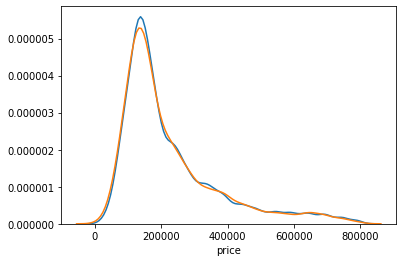

In [37]:
f, ax = plt.subplots(1)
sns.distplot(y_train, bins=100, hist=False, ax=ax);
sns.distplot(y_test, bins=100, hist=False, ax=ax);

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [40]:
drop_features = [
    'year',
]
numeric_features = [
    'bathrooms', 
    'bedrooms',
    'garage',
    'servide_fees',
    'surface_balcony',
    'surface_covered',
    'floor',
    'm2_index',
    'decade',
]
binary_features = [
    'floor_special',
    'facilities',
    'near_river',
    'is_house',
    'barbecue',
]
categorical_features = [
    'zone',
    'orientation',
    'state',
]

## Preprocesing features

In [41]:
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
    ])

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(categories='auto', handle_unknown='ignore')),
    ])

In [42]:
preprocessor_num = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('drop', 'drop', drop_features + categorical_features),
        ('passthrough', 'passthrough', binary_features),
    ],
    n_jobs=-1)

preprocessor_cat = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('drop', 'drop', drop_features),
        ('passthrough', 'passthrough', binary_features),
    ],
    n_jobs=-1)

In [43]:
preprocessor_num.fit_transform(X_train)

array([[-0.8082290262701954, -1.9981988716030301, -0.7392092614893319,
        ..., False, 0, False],
       [-0.8082290262701954, -1.9981988716030301, -0.7392092614893319,
        ..., False, 0, False],
       [1.8940340836527005, 0.6847909038045498, -0.7392092614893319, ...,
        False, 0, False],
       ...,
       [-0.8082290262701954, -1.1038689464671703, -0.7392092614893319,
        ..., False, 0, False],
       [-0.8082290262701954, -1.9981988716030301, -0.7392092614893319,
        ..., False, 0, False],
       [-0.8082290262701954, -0.2095390213313102, -0.7392092614893319,
        ..., False, 0, False]], dtype=object)

In [44]:
preprocessor_cat.fit_transform(X_train)

<16876x114 sparse matrix of type '<class 'numpy.float64'>'
	with 216439 stored elements in Compressed Sparse Row format>

## Models

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

def measure_performance(y_real, y_pred):
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    r2 = r2_score(y_real, y_pred)
    return 'RMSE={:.1f}, R2={:.3f}'.format(rmse, r2)

def plot_error(y_real, y_pred):
    f, ax = plt.subplots(1)
    ax.scatter(y_real, y_pred, alpha=0.4)
    ax.plot(ax.get_xbound(), ax.get_xbound(), '--k')
    ax.set(ylabel='Predicted values',
           xlabel='True values',
           title='test v/s predict price')
    return f, ax

### Linear model 

In [46]:
from sklearn.linear_model import LinearRegression
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
lrp = Pipeline(steps=[('preprocessor', preprocessor_num),
                      ('linear_regressor', LinearRegression(fit_intercept=True))])

In [47]:
lrp.fit(X_train, y_train);

In [48]:
y_pred_test = lrp.predict(X_test)
y_pred_train = lrp.predict(X_train)

In [49]:
print(measure_performance(y_test, y_pred_test) + ' -> Generalization error')
print(measure_performance(y_train, y_pred_train) + ' -> Train error')

RMSE=81811.4, R2=0.697 -> Generalization error
RMSE=81808.4, R2=0.704 -> Train error


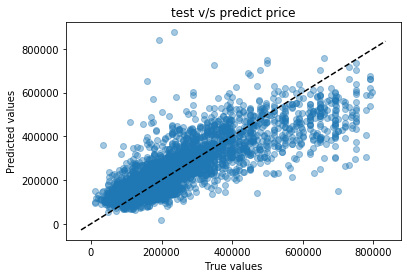

In [50]:
plot_error(y_test, y_pred_test);

In [51]:
weight = pd.Series(lrp['linear_regressor'].coef_, index=numeric_features+binary_features)
weight.apply(np.abs).sort_values(ascending=False)

surface_covered    63019.599297
bathrooms          53376.993123
is_house           39114.709866
servide_fees       23463.950417
garage             23278.416705
barbecue           18087.419788
facilities         17208.355199
floor_special      14141.457094
m2_index           10111.610880
near_river          6010.474995
decade              5603.650514
bedrooms            4404.378270
floor               2109.149343
surface_balcony     1271.575646
dtype: float64

### Ensamble model

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rfp = Pipeline(steps=[('preprocessor', preprocessor_num),
                      ('rf_regressor', RandomForestRegressor(n_estimators=100,
                                                             min_samples_leaf=5,
                                                             n_jobs=-1))])

rfp.fit(X_train, y_train);

In [54]:
y_pred_test = rfp.predict(X_test)
y_pred_train = rfp.predict(X_train)

In [55]:
print(measure_performance(y_test, y_pred_test) + ' -> Generalization error')
print(measure_performance(y_train, y_pred_train) + ' -> Train error')

RMSE=68541.0, R2=0.787 -> Generalization error
RMSE=52653.1, R2=0.878 -> Train error


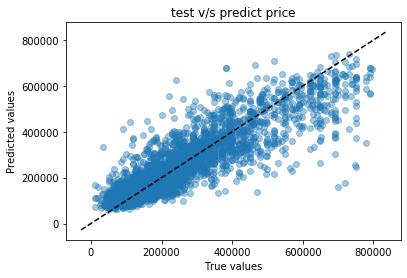

In [56]:
plot_error(y_test, y_pred_test);

### Add more features (caterorical)

In [57]:
rfp = Pipeline(steps=[('preprocessor', preprocessor_cat),
                      ('rf_regressor', RandomForestRegressor(n_estimators=100,
                                                             min_samples_leaf=5,
                                                             n_jobs=-1))])

rfp.fit(X_train, y_train);

In [58]:
y_pred_test = rfp.predict(X_test)
y_pred_train = rfp.predict(X_train)

In [59]:
print(measure_performance(y_test, y_pred_test) + ' -> Generalization error')
print(measure_performance(y_train, y_pred_train) + ' -> Train error')

RMSE=60187.3, R2=0.836 -> Generalization error
RMSE=44048.8, R2=0.914 -> Train error


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5f78563400>)

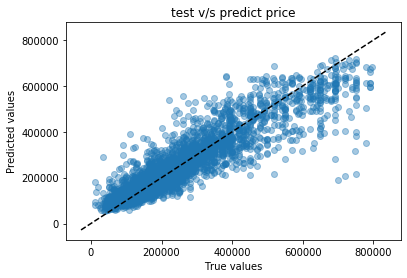

In [60]:
# Generalization error
plot_error(y_test, y_pred_test)

# Custom Transformers

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomStdScaler(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.mean_ = None
        self.std_ = None
    
    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.mean_ = X.mean().to_numpy()[None, :]
            self.std_ = X.std().to_numpy()[None, :]
        else:
            self.mean_ = X.mean(axis=0)[None, :]
            self.std_ = X.std(axis=0)[None, :]
        
        return self
    
    def transform(self, X, y=None):
        return (X - self.mean_)/self.std_


In [62]:
std_scaler = CustomStdScaler()
custom_dataset = std_scaler.fit_transform(X_train[numeric_features].to_numpy())
custom_dataset

array([[-0.80822903, -1.99819887, -0.73920926, ..., -0.39382037,
         0.25451126, -0.73573313],
       [-0.80822903, -1.99819887, -0.73920926, ..., -0.39382037,
        -1.07866   , -0.73573313],
       [ 1.89403408,  0.6847909 , -0.73920926, ..., -0.39382037,
         0.25451126,  0.36927434],
       ...,
       [-0.80822903, -1.10386895, -0.73920926, ...,  1.49481635,
         0.25451126,  1.47428182],
       [-0.80822903, -1.99819887, -0.73920926, ..., -0.39382037,
         0.25451126,  0.36927434],
       [-0.80822903, -0.20953902, -0.73920926, ..., -0.39382037,
         0.25451126,  1.47428182]])

In [63]:
custom_numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('custom', CustomStdScaler()),
    ])
custom_preprocessor_cat = ColumnTransformer(
    transformers=[
        ('num', custom_numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('drop', 'drop', drop_features),
        ('passthrough', 'passthrough', binary_features),
    ],
    n_jobs=-1)

In [64]:
rfp = Pipeline(steps=[('preprocessor', custom_preprocessor_cat),
                      ('rf_regressor', RandomForestRegressor(n_estimators=100,
                                                             min_samples_leaf=5,
                                                             n_jobs=-1))])

rfp.fit(X_train, y_train);

In [65]:
y_pred_test = rfp.predict(X_test)
y_pred_train = rfp.predict(X_train)

In [66]:
print(measure_performance(y_test, y_pred_test) + ' -> Generalization error')
print(measure_performance(y_train, y_pred_train) + ' -> Train error')

RMSE=60214.1, R2=0.836 -> Generalization error
RMSE=44089.7, R2=0.914 -> Train error


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5f7859e1d0>)

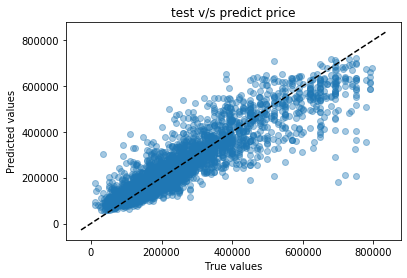

In [67]:
# Generalization error
plot_error(y_test, y_pred_test)

# Next steps
- Regularization
- Cross validation (for small datasets)
- Hyperparameter tunning - Fine tunning
- Feature selection


- Launch, Monitor, Maintain
- API

# References
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. (2019) Aurélien Géron
- [API design for machine learning software:
experiences from the scikit-learn project](https://arxiv.org/pdf/1309.0238.pdf)

- [Scikit-Learn documenetation](https://scikit-learn.org/stable/documentation.html)

# DS Team
<img src='../img/team_0.png'>